In [115]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import scipy.signal as signal
import datetime as dt

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

sys.path.append("/home/aldo/notebooks/code/")
import sxrf_download

In [214]:
xrdata = sxrf_download.sunpy_xrf("2025-03-07", "2025-05-26")

Files Downloaded:   0%|          | 0/31 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20250307_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

In [117]:
xrdata.head()

,GOES-16_short,GOES-16_long,xrsa_quality,xrsb_quality
DateTime,,,,
2025-03-08 00:00:00,1.140699e-08,1.009339e-06,0,0
2025-03-08 00:01:00,1.099027e-08,1.002177e-06,0,0
2025-03-08 00:02:00,1.078179e-08,9.929648e-07,0,0
2025-03-08 00:03:00,9.734785e-09,9.856274e-07,0,0
2025-03-08 00:04:00,9.594284e-09,9.801159e-07,0,0


In [3]:
!ls /data/pavnet/2025/PIURA/data


2025-05-27  PIU_AMPLITUDE_2025-03-07-to-2025-05-27.csv


In [4]:
path = "/data/pavnet/2025/PIURA/data/PIU_AMPLITUDE_2025-03-07-to-2025-05-27.csv"

In [37]:
piudf = pd.read_csv(path, index_col=[0], parse_dates=True)

In [18]:
piudf.head()

,NPM,NAA,NLK,NLM,NAU,NPM-filt,NAA-filt,NLK-filt,NLM-filt,NAU-filt
2025-03-07 05:00:07,2.804085,1.316293,0.973761,0.094818,0.000002,2.804085,1.316293,0.973761,0.094818,0.000002
2025-03-07 05:00:17,2.745619,1.308275,0.993759,0.104351,0.000003,2.824662,1.298900,0.977127,0.090437,0.000002
2025-03-07 05:00:27,2.815842,1.259773,0.967159,0.076102,0.000003,2.843241,1.282073,0.981060,0.087121,0.000002
2025-03-07 05:00:36,2.897824,1.279800,0.936262,0.084555,0.000001,2.858111,1.266364,0.985883,0.085715,0.000002
2025-03-07 05:00:46,2.831571,1.289648,1.039614,0.100693,0.000002,2.868109,1.252319,0.991504,0.086660,0.000002


In [38]:
df1m = piudf.resample('1T').mean()
df1m.head(10)

/tmp/ipykernel_783422/3866379178.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df1m = piudf.resample('1T').mean()


,NPM,NAA,NLK,NLM,NAU,NPM-filt,NAA-filt,NLK-filt,NLM-filt,NAU-filt
2025-03-07 05:00:00,2.837140,1.282288,0.981409,0.090553,0.000002,2.845170,1.276075,0.984451,0.089105,0.000002
2025-03-07 05:01:00,2.850124,1.238785,1.008950,0.106652,0.000003,2.861597,1.232207,1.001842,0.104071,0.000003
2025-03-07 05:02:00,2.855275,1.272786,0.982016,0.097555,0.000002,2.869461,1.287610,0.977717,0.095911,0.000002
2025-03-07 05:03:00,2.796678,1.255290,0.997701,0.134630,0.000002,2.789912,1.254215,1.005136,0.136374,0.000002
2025-03-07 05:04:00,2.748721,1.273370,0.953571,0.127382,0.000003,2.744237,1.268263,0.952609,0.134561,0.000003
2025-03-07 05:05:00,2.832293,1.268780,0.969370,0.142860,0.000002,2.819386,1.282827,0.966013,0.143740,0.000002
2025-03-07 05:06:00,2.849982,1.244083,0.993322,0.111505,0.000003,2.832108,1.233127,0.995799,0.104996,0.000002
2025-03-07 05:07:00,2.806418,1.225832,0.996073,0.100094,0.000002,2.837638,1.220872,0.995441,0.114749,0.000002
2025-03-07 05:08:00,2.947878,1.164581,0.990970,0.143971,0.000002,2.937371,1.170737,0.996953,0.127639,0.000002
2025-03-07 05:09:00,2.950112,1.220333,0.967559,0.122236,0.000003,2.923250,1.219653,0.970670,0.119861,0.000003


In [23]:
# days in data (unique)
days = np.unique(piudf.index.date)

In [39]:
# pivot to matrix: X(time) x Y(date)
df1m['date'] = df1m.index.date
df1m['time'] = df1m.index.time
piudfm = df1m.pivot_table(index='date', columns='time', values='NAA-filt')

In [32]:
piudfm

time,00:00:00,00:01:00,00:02:00,00:03:00,00:04:00,00:05:00,00:06:00,00:07:00,00:08:00,00:09:00,...,23:50:00,23:51:00,23:52:00,23:53:00,23:54:00,23:55:00,23:56:00,23:57:00,23:58:00,23:59:00
date,,,,,,,,,,,,,,,,,,,,,
2025-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.887954,0.825038,0.769456,0.796162,0.759460,0.725427,0.725869,0.698740,0.675689,0.624039
2025-03-08,0.557035,0.568043,0.558471,0.501997,0.501009,0.488194,0.472801,0.460624,0.479205,0.370619,...,0.686423,0.698799,0.673336,0.679499,0.666544,0.666064,0.692674,0.672114,0.658606,0.656652
2025-03-09,0.682125,0.629703,0.658480,0.663851,0.694030,0.652309,0.645633,0.694678,0.694466,0.676657,...,0.425758,0.379971,0.365639,0.338464,0.319198,0.290794,0.276726,0.260664,0.261502,0.259253
2025-03-10,0.221172,0.195330,0.219211,0.226144,0.234491,0.232323,0.252668,0.298147,0.288328,0.311005,...,0.638764,0.683704,0.677382,0.668776,0.631703,0.628584,0.606783,0.572441,0.527540,0.501523
2025-03-11,0.488673,0.470192,0.454014,0.468322,0.433118,0.453584,0.412363,0.422751,0.425853,0.469388,...,0.776314,0.746681,0.754910,0.718893,0.701000,0.723329,0.689433,0.630702,0.574952,0.605513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,0.774869,0.788946,0.778634,0.789777,0.734095,0.745518,0.697508,0.729930,0.708994,0.661501,...,0.944331,1.005568,0.953296,0.942992,0.906320,0.941323,0.899026,0.880985,0.852317,0.930212
2025-05-24,0.908991,0.871058,0.791971,0.873220,0.821950,0.733625,0.837625,0.790286,0.740827,0.806411,...,0.912406,0.933671,0.890155,0.927939,0.906310,0.955614,0.944158,0.880355,0.875291,0.871889
2025-05-25,0.842522,0.847874,0.853203,0.814515,0.842418,0.836996,0.802658,0.858005,0.736907,0.655954,...,0.823914,0.815059,0.759556,0.826286,0.810845,0.822982,0.757778,0.721781,0.707127,0.814576


In [40]:
piudfm = piudfm.loc[dt.date(2025,3,8):dt.date(2025,5,26), :]

In [41]:
piudfm

time,00:00:00,00:01:00,00:02:00,00:03:00,00:04:00,00:05:00,00:06:00,00:07:00,00:08:00,00:09:00,...,23:50:00,23:51:00,23:52:00,23:53:00,23:54:00,23:55:00,23:56:00,23:57:00,23:58:00,23:59:00
date,,,,,,,,,,,,,,,,,,,,,
2025-03-08,0.557035,0.568043,0.558471,0.501997,0.501009,0.488194,0.472801,0.460624,0.479205,0.370619,...,0.686423,0.698799,0.673336,0.679499,0.666544,0.666064,0.692674,0.672114,0.658606,0.656652
2025-03-09,0.682125,0.629703,0.658480,0.663851,0.694030,0.652309,0.645633,0.694678,0.694466,0.676657,...,0.425758,0.379971,0.365639,0.338464,0.319198,0.290794,0.276726,0.260664,0.261502,0.259253
2025-03-10,0.221172,0.195330,0.219211,0.226144,0.234491,0.232323,0.252668,0.298147,0.288328,0.311005,...,0.638764,0.683704,0.677382,0.668776,0.631703,0.628584,0.606783,0.572441,0.527540,0.501523
2025-03-11,0.488673,0.470192,0.454014,0.468322,0.433118,0.453584,0.412363,0.422751,0.425853,0.469388,...,0.776314,0.746681,0.754910,0.718893,0.701000,0.723329,0.689433,0.630702,0.574952,0.605513
2025-03-12,0.585435,0.606932,0.647267,0.593473,0.590556,0.410757,0.421982,0.408713,0.555114,0.595435,...,0.731014,0.614710,0.625567,0.563738,0.639241,0.582011,0.533080,0.530231,0.579429,0.570338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-22,0.946542,0.944238,0.882531,0.826386,0.822673,0.907655,0.926410,0.812079,0.802107,0.836227,...,0.826301,0.814716,0.811551,0.786969,0.823405,0.833184,0.816454,0.822382,0.826924,0.820607
2025-05-23,0.774869,0.788946,0.778634,0.789777,0.734095,0.745518,0.697508,0.729930,0.708994,0.661501,...,0.944331,1.005568,0.953296,0.942992,0.906320,0.941323,0.899026,0.880985,0.852317,0.930212
2025-05-24,0.908991,0.871058,0.791971,0.873220,0.821950,0.733625,0.837625,0.790286,0.740827,0.806411,...,0.912406,0.933671,0.890155,0.927939,0.906310,0.955614,0.944158,0.880355,0.875291,0.871889


In [55]:
naa_mean = np.mean(piudfm.values, axis=0)
timeh = np.linspace(0,24,piudfm.shape[1])

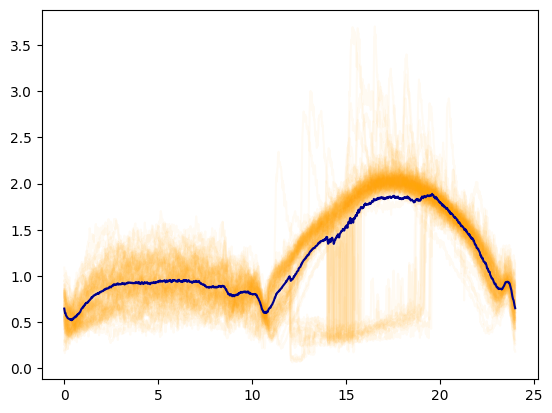

In [56]:
for d in piudfm.index:
    plt.plot(timeh, piudfm.loc[d,:], color="orange", alpha=0.05)
plt.plot(timeh, naa_mean, color="darkblue")    

Text(0.5, 1.0, 'NAA-PIU')

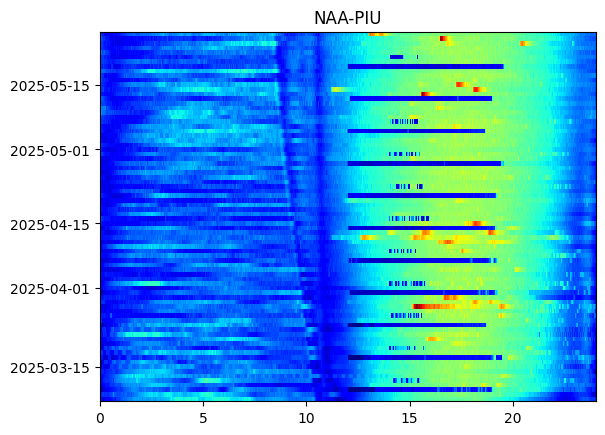

In [60]:
plt.pcolormesh(timeh, piudfm.index, piudfm.values, cmap="jet")
plt.title("NAA-PIU")
#plt.ylim(dt.date(2025,4,20),dt.date(2025,4,25))

<Axes: xlabel='time'>

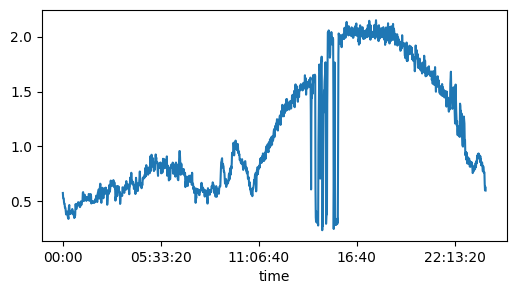

In [62]:
plt.figure(figsize=(6,3))
piudfm.loc[dt.date(2025,4,23), :].plot()

Text(0.5, 1.0, 'NAA-PIU [dB]')

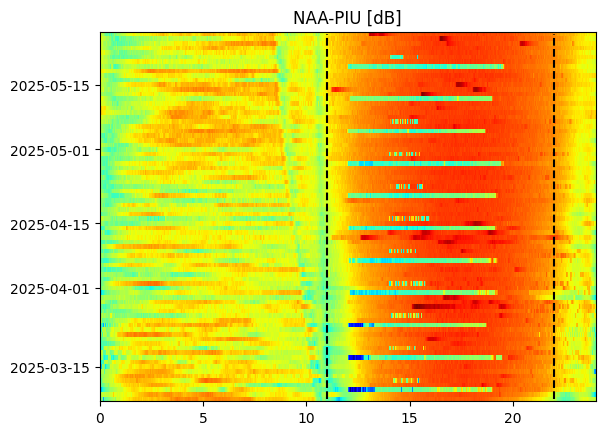

In [135]:
# amp to dB
piudfmdb = 20*np.log10(piudfm)
plt.pcolormesh(timeh, piudfmdb.index, piudfmdb.values, cmap="jet", 
               )
plt.vlines([11,22], piudfmdb.index[0],piudfmdb.index[-1],color="k", linestyle="--")
plt.title("NAA-PIU [dB]")

In [80]:
nday , nmin = piudfmdb.shape

<Axes: xlabel='DateTime'>

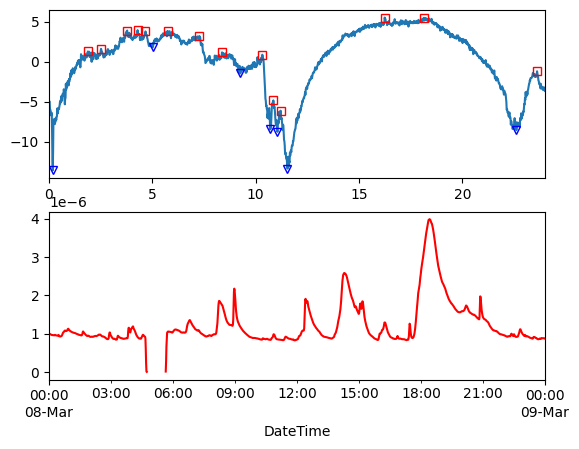

In [192]:
ii=0
y = piudfmdb.iloc[ii,:].values
x = timeh
ax = plt.subplot(211)
plt.plot(x,y)
pi, _ = signal.find_peaks(y, distance=20,prominence=1, width=0)
pi_dw, _ = signal.find_peaks(-y, distance=20,prominence=2)
plt.plot(x[pi],y[pi], 'rs', markerfacecolor="none")
plt.plot(x[pi_dw],y[pi_dw], 'vb', markerfacecolor="none")
plt.xlim(0,24)
ax2 = plt.subplot(212)

xrdata.loc[piudfmdb.index[ii]:piudfmdb.index[ii]+dt.timedelta(hours=24), 
"GOES-16_long"].plot(ax=ax2, color="r")

#plt.xlim(20,25)

In [93]:

piuday = piudfmdb.loc[:, dt.time(hour=12): dt.time(hour=22)].copy()

In [ ]:
found_peaks = []
dh = piuday.columns
for dd in piuday.index:
    y = piuday.loc[dd,:]
    pi, _ = signal.find_peaks(y, distance=20)
    h = dh[]
    found_peaks.append((piuday.columns, dd))

plt.pcolormesh(timeh, piudfmdb.index, piudfmdb.values, cmap="jet", 
   

In [142]:
dfdb = 20*np.log10(df1m["NAA-filt"])

In [147]:
naaday = dfdb.between_time("12:00","22:00").copy()

(np.float64(20155.0), np.float64(20156.0))

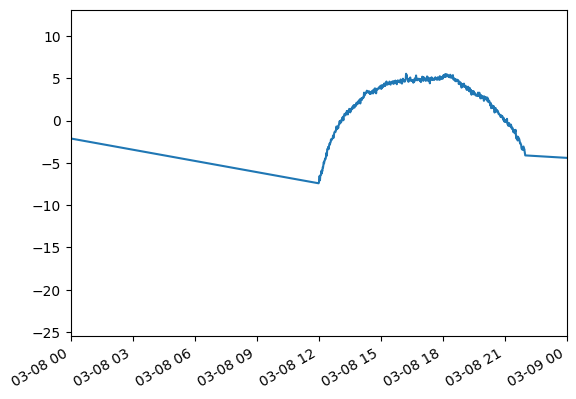

In [149]:
naaday.plot()
plt.xlim(dt.date(2025,3,8),dt.date(2025,3,9))

In [160]:
print(f"original shape (wholetime): {naaday.shape}\nOnly day shape: {df1m.shape}")

original shape (wholetime): (48681,)
Only day shape: (116640, 12)


In [200]:
day_peaks, _ = signal.find_peaks(naaday, distance=30,prominence=1, width=10)
pi_dw, _ = signal.find_peaks(-naaday, distance=20,prominence=2)
idx1 =  naaday.index[day_peaks]
idx2 =  naaday.index[pi_dw]
ydate = naaday.index[day_peaks].date
xtime = [t.hour + t.minute/60 for t in naaday.index[day_peaks].time]

In [197]:
# pivot to matrix: X(time) x Y(date)
dfday = pd.DataFrame(naaday)
# States 
# 1: fall of signal
# 2: normal
# 3: flareactive
dfday["state"] = np.ones()*2 # set default 
dfday['date'] = dfday.index.date
dfday['time'] = dfday.index.time
piudfm = dfday.pivot_table(index='date', columns='time', values='NAA-filt')

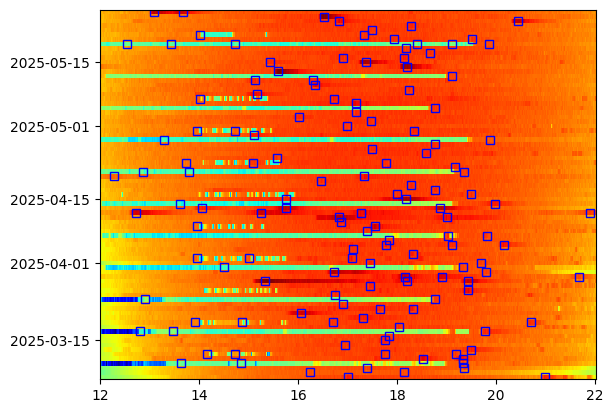

In [198]:
tdayh = np.linspace(12,22,piudfm.shape[1])
plt.pcolormesh(tdayh, piudfm.index, piudfm.values, cmap="jet", 
               )
plt.plot(xtime, ydate, marker="s", lw=0,markeredgecolor="blue",markerfacecolor="none")

In [199]:
len(xtime)

140

(1e-07, 0.001)

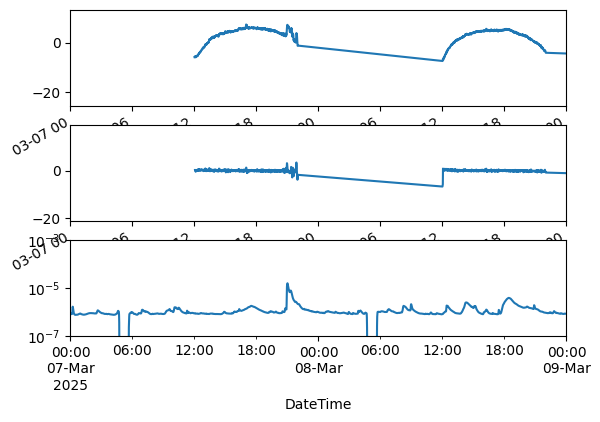

In [217]:
# derivative
dnaaday = naaday.diff(3)
ax = plt.subplot(311)
naaday.plot(ax=ax)
plt.xlim(dt.date(2025,3,7),dt.date(2025,3,9))

ax = plt.subplot(312)
dnaaday.plot(ax=ax)
plt.xlim(dt.date(2025,3,7),dt.date(2025,3,9))
ax = plt.subplot(313)
xrdata["GOES-16_long"].plot(ax=ax)
ax.set_yscale("log")
plt.xlim(dt.date(2025,3,7),dt.date(2025,3,9))
plt.ylim(1e-7, 1e-3)

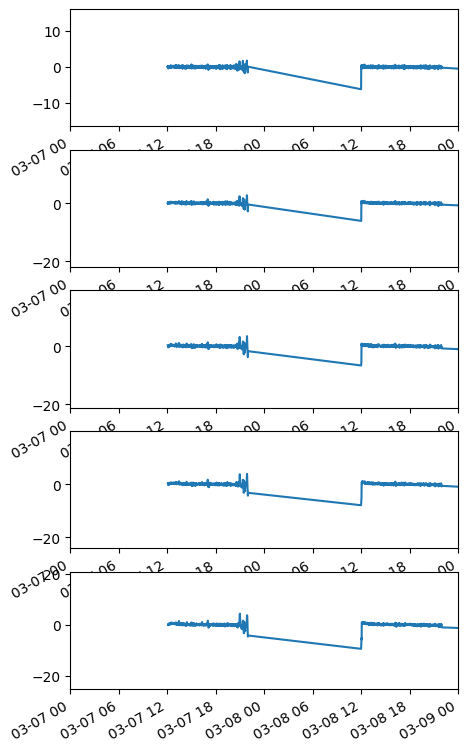

In [220]:
fig = plt.figure(figsize=(5,10))
n= 5
for i in range(1,n+1):
    dnaaday = naaday.diff(i)
    ax = plt.subplot(n,1,i)
    dnaaday.plot(ax=ax)
    plt.xlim(dt.date(2025,3,7),dt.date(2025,3,9))

In [204]:
np.concat((idx1,idx2)).shape


(369,)

In [226]:
naaday.to_csv("PIU_070325-260525_12-22h.csv")

In [ ]:
dnaaday.to_csv("PIU__070325-260525_12-22h.csv")

In [223]:
df = pd.DataFrame(dnaaday)

In [224]:
df["state"] = 1

In [225]:
df

,NAA-filt,state
2025-03-07 12:00:00,NaN,1
2025-03-07 12:01:00,NaN,1
2025-03-07 12:02:00,NaN,1
2025-03-07 12:03:00,NaN,1
2025-03-07 12:04:00,NaN,1
...,...,...
2025-05-26 21:57:00,-0.599535,1
2025-05-26 21:58:00,-0.459017,1
2025-05-26 21:59:00,-1.093475,1
2025-05-26 22:00:00,0.019958,1
